In [1]:
from cos_pos_emb import positional_encoding_auto_ND, positional_encoding_vanilla
from utils import run_tsne
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

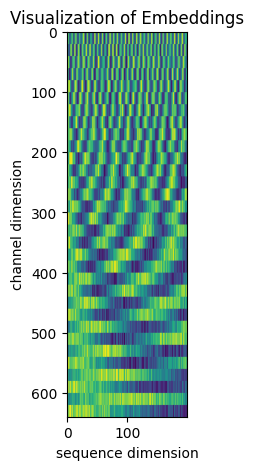

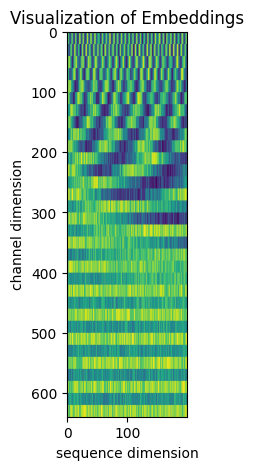

In [2]:
EMB_DIM = 32
SEQ_LEN = 200
NOISE = 1.0

emb = positional_encoding_auto_ND(seq_length=SEQ_LEN, emb_dim=EMB_DIM, space_dim=1)
emb_control = positional_encoding_vanilla(seq_length=SEQ_LEN, emb_dim=EMB_DIM)

emb_flat = emb.copy().squeeze().reshape((-1, EMB_DIM))
emb_control_flat = emb_control.copy().squeeze().reshape((-1, EMB_DIM))

emb_flat = emb_flat + np.random.rand(*emb_flat.shape) * NOISE - 0.5
emb_control_flat = emb_control_flat + np.random.rand(*emb_control_flat.shape) * NOISE - 0.5

emb_flat = np.repeat(emb_flat, 20, axis=1)
emb_control_flat = np.repeat(emb_control_flat, 20, axis=1)

plt.figure(figsize=(20, 5))
plt.imshow(emb_flat.T)
plt.ylabel('channel dimension')
plt.xlabel('sequence dimension')
plt.title('Visualization of Embeddings')
plt.show()

plt.figure(figsize=(20, 5))
plt.imshow(emb_control_flat.T)
plt.ylabel('channel dimension')
plt.xlabel('sequence dimension')
plt.title('Visualization of Embeddings')
plt.show()

In [3]:


emb = positional_encoding_auto_ND(seq_length=SEQ_LEN, emb_dim=EMB_DIM, space_dim=1)
emb_control = positional_encoding_vanilla(seq_length=SEQ_LEN, emb_dim=EMB_DIM)

emb_flat = emb.copy().squeeze().reshape((-1, EMB_DIM))
emb_control_flat = emb_control.copy().squeeze().reshape((-1, EMB_DIM))

emb_flat = emb_flat + np.random.rand(*emb_flat.shape) * NOISE
emb_control_flat = emb_control_flat + np.random.rand(*emb_control_flat.shape) * NOISE

tsne_out = run_tsne(emb_flat, perplexity=50.0)
tsne_out_control = run_tsne(emb_control_flat, perplexity=50.0)

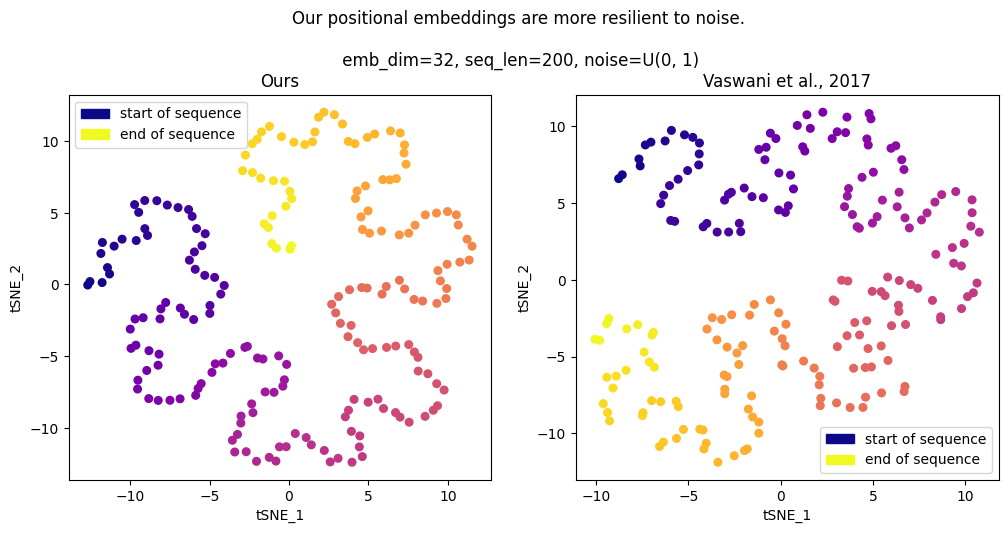

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1], s=30,  c=np.arange(tsne_out.shape[0]), cmap='plasma')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title('Ours')

red_patch = mpatches.Patch(color='#0d0887', label='start of sequence')
green_patch = mpatches.Patch(color='#f0f921', label='end of sequence')
plt.legend(handles=[red_patch, green_patch])

plt.subplot(1, 2, 2)
plt.scatter(tsne_out_control[:, 0], tsne_out_control[:, 1], s=30,  c=np.arange(tsne_out_control.shape[0]), cmap='plasma')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title('Vaswani et al., 2017')

red_patch = mpatches.Patch(color='#0d0887', label='start of sequence')
green_patch = mpatches.Patch(color='#f0f921', label='end of sequence')
plt.legend(handles=[red_patch, green_patch])

plt.suptitle(f'Our positional embeddings are more resilient to noise.\n\n emb_dim={EMB_DIM}, seq_len={SEQ_LEN}, noise=U(0, 1)\n\n', y=1.05)
plt.savefig("figures/noise_resilience.png", bbox_inches="tight")
plt.show()